In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 零售会员数据分析案例

## 会员存量、增量分析

In [2]:
# 用到的数据：会员信息查询.xlsx
import pandas as pd
custom_info=pd.read_excel('data/会员信息查询.xlsx')
custom_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952714 entries, 0 to 952713
Data columns (total 12 columns):
会员卡号      952714 non-null object
会员等级      952714 non-null object
会员来源      952714 non-null object
注册时间      952714 non-null datetime64[ns]
所属店铺编码    952714 non-null object
门店店员编码    253828 non-null object
省份        264801 non-null object
城市        264758 non-null object
性别        952714 non-null object
生日        785590 non-null object
年齡        952705 non-null float64
生命级别      952714 non-null object
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 87.2+ MB


In [3]:
#会员信息查询
custom_info.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡


In [4]:
# 需要按月统计注册的会员数量
# 注册时间原始数据需要处理成年-月的形式
# 给 会员信息表 添加年月列
from datetime import datetime
custom_info.loc[:,'注册年月'] = custom_info['注册时间'].apply(lambda x : x.strftime('%Y-%m'))
custom_info[['会员卡号','会员等级','会员来源','注册时间','注册年月']].head()



,会员卡号,会员等级,会员来源,注册时间,注册年月
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,2019-03
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,2019-03
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,2019-03
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,2019-03
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,2019-03


In [5]:
month_count = custom_info.groupby('注册年月')[['会员卡号']].count()
month_count.columns = ['月增量']
month_count.head()


,月增量
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165


In [7]:
# 用数据透视表实现相同功能：dataframe.pivot_table()
# index：行索引，传入原始数据的列名
# columns：列索引，传入原始数据的列名
# values: 要做聚合操作的列名
# aggfunc：聚合函数
custom_info.pivot_table(index = '注册年月',values = '会员卡号',aggfunc = 'count')



,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165
2018-01,15531
2018-02,13798
2018-03,49320
2018-04,71699


In [8]:
# 计算存量 cumsum 对某一列 做累积求和 1 1+2 1+2+3 1+2+3+4 ...
# 通过cumsum 对月增量做累积求和
month_count.loc[:,'存量'] = month_count['月增量'].cumsum()
month_count


,月增量,存量
注册年月,,
2017-08,392910,392910
2017-09,760,393670
2017-10,996,394666
2017-11,1710,396376
2017-12,4165,400541
2018-01,15531,416072
2018-02,13798,429870
2018-03,49320,479190
2018-04,71699,550889


Text(0.5, 1.0, '会员存量增量分析')

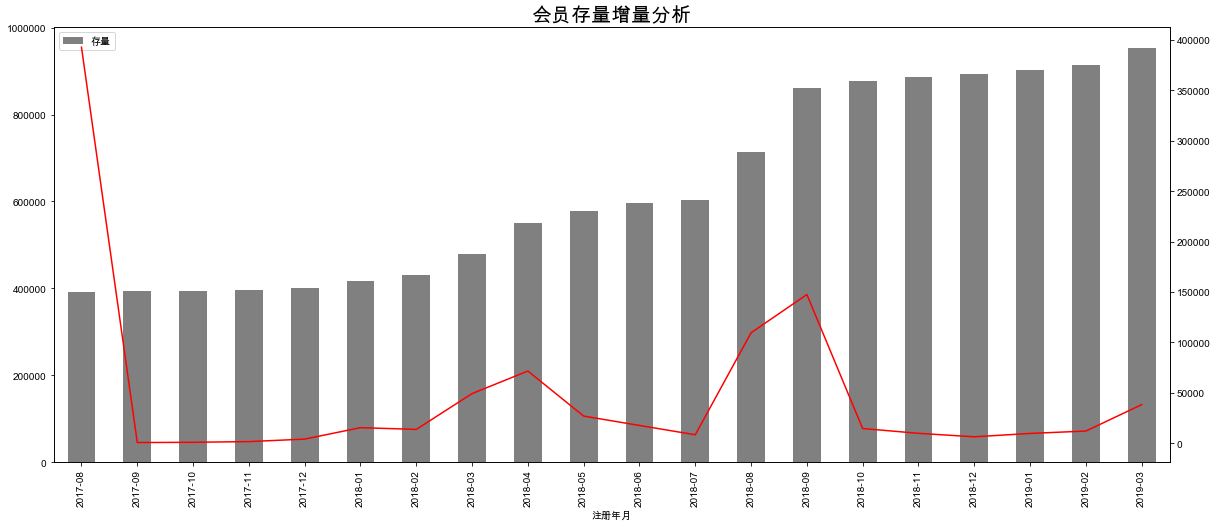

In [33]:
# 可视化，需要去除第一个月数据
# 第一个月数据是之前所有会员数量的累积（数据质量问题）

# Pandas版本>1.1
import matplotlib.pyplot as plt
month_count['月增量'].plot(figsize = (20,8),color='red',secondary_y = True)
month_count['存量'].plot.bar(figsize = (20,8),color='gray',legend = True)
plt.title("会员存量增量分析",fontsize=20)


## 增量等级分布

In [11]:
# 通过groupby实现，注册年月，会员等级，按这两个字段分组，对任意字段计数
month_degree_count =custom_info.groupby(['注册年月','会员等级'])[['会员卡号']].count()
month_degree_count


会员卡号
注册年月    会员等级        
2017-08 白银会员  376648
        钻石会员     185
        铂金会员     387
        黄金会员   15690
2017-09 白银会员     530
...              ...
2019-02 黄金会员    8140
2019-03 白银会员   10580
        钻石会员       3
        铂金会员      37
        黄金会员   27752

[80 rows x 1 columns]

In [12]:
# 分组之后得到的是multiIndex类型的索引，将multiIndex索引变成普通索引
# 使用reset_index()
month_degree_count.reset_index()


,注册年月,会员等级,会员卡号
0,2017-08,白银会员,376648
1,2017-08,钻石会员,185
2,2017-08,铂金会员,387
3,2017-08,黄金会员,15690
4,2017-09,白银会员,530
...,...,...,...
75,2019-02,黄金会员,8140
76,2019-03,白银会员,10580
77,2019-03,钻石会员,3
78,2019-03,铂金会员,37


In [13]:
#使用unstack()
month_degree_count.unstack()

会员卡号                 
会员等级       白银会员 钻石会员 铂金会员   黄金会员
注册年月                            
2017-08  376648  185  387  15690
2017-09     530    3   10    217
2017-10     603   13   17    363
2017-11    1311   19   20    360
2017-12    3512   15   24    614
2018-01   11244   24   64   4199
2018-02    9937    9   34   3818
2018-03   41546   57   94   7623
2018-04   62613   48   83   8955
2018-05   19317   19   56   7617
2018-06   11292    7   23   6396
2018-07    3932    8   28   4515
2018-08   95584   27   65  13998
2018-09  133090   20   63  14412
2018-10    9093   15   34   5512
2018-11    6313    4   29   3566
2018-12    2808    3   29   3620
2019-01    3661    5    9   6120
2019-02    4001    5   17   8140
2019-03   10580    3   37  27752

In [14]:
# 使用透视表实现
member_rating = custom_info.pivot_table(index = '注册年月',columns='会员等级',values='会员卡号',aggfunc = 'count')
member_rating


会员等级,白银会员,钻石会员,铂金会员,黄金会员
注册年月,,,,
2017-08,376648,185,387,15690
2017-09,530,3,10,217
2017-10,603,13,17,363
2017-11,1311,19,20,360
2017-12,3512,15,24,614
2018-01,11244,24,64,4199
2018-02,9937,9,34,3818
2018-03,41546,57,94,7623
2018-04,62613,48,83,8955


In [15]:
# 去掉首月数据
member_rating=member_rating[1:]


Text(0.5, 1.0, '会员增量等级分布')

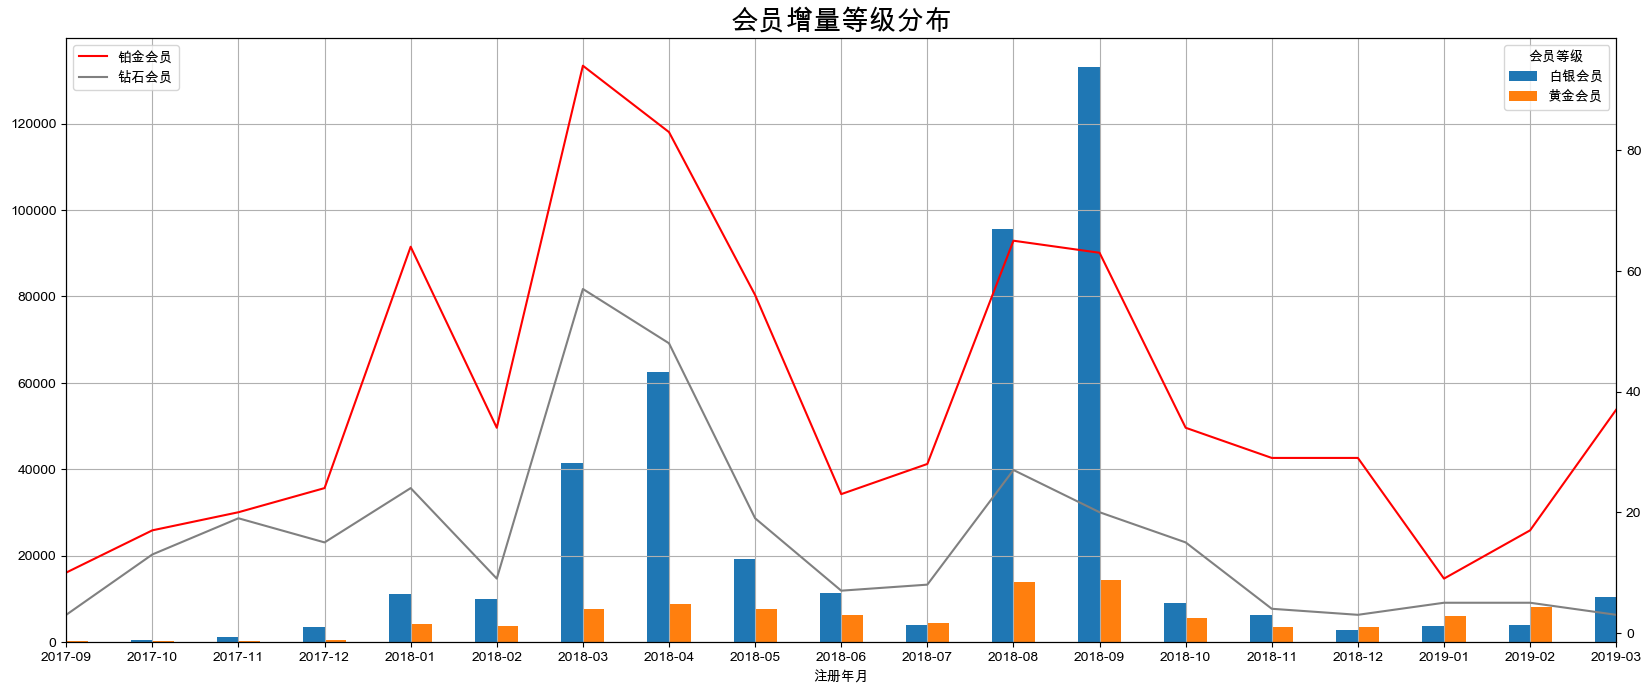

In [19]:
# pandas绘制图表
fig, ax1 = plt.subplots(figsize=(20,8),dpi=100)#构建坐标系
ax2 = ax1.twinx()#构建双胞胎坐标系
member_rating[['白银会员','黄金会员']].plot.bar(ax = ax1,rot=0,grid = True,legend=True)
member_rating[['铂金会员','钻石会员']].plot(ax = ax2,color = ['red','gray'],)
ax2.legend(loc='upper left')
plt.title("会员增量等级分布",fontsize=20)

## 增量等级占比分析

In [20]:
# 增量等级占比分析，查看增量会员的消费情况
# 按行求和
member_rating.loc[:,'总计'] = member_rating.sum(axis = 'columns')


/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
#计算白银和黄金会员等级占比 铂金钻石会员数量太少暂不计算
member_rating.loc[:,'白银会员占比'] = member_rating['白银会员'].div(member_rating['总计'])
member_rating.loc[:,'黄金会员占比'] = member_rating['黄金会员'].div(member_rating['总计'])
member_rating


会员等级,白银会员,钻石会员,铂金会员,黄金会员,总计,白银会员占比,黄金会员占比
注册年月,,,,,,,
2017-09,530,3,10,217,760,0.697368,0.285526
2017-10,603,13,17,363,996,0.605422,0.364458
2017-11,1311,19,20,360,1710,0.766667,0.210526
2017-12,3512,15,24,614,4165,0.843217,0.147419
2018-01,11244,24,64,4199,15531,0.723971,0.270363
2018-02,9937,9,34,3818,13798,0.720177,0.276707
2018-03,41546,57,94,7623,49320,0.842376,0.154562
2018-04,62613,48,83,8955,71699,0.873276,0.124897
2018-05,19317,19,56,7617,27009,0.715206,0.282017


Text(0.5, 1.0, '会员等级占比分析')

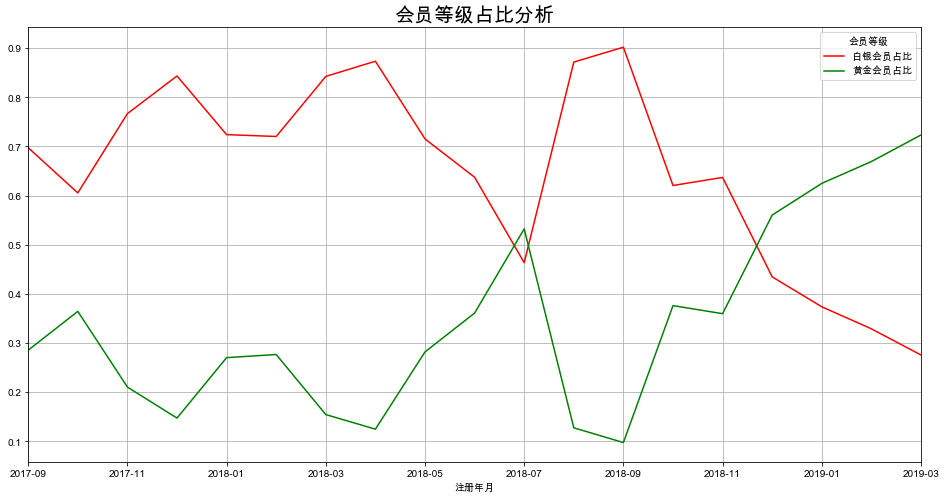

In [23]:
# 绘图
member_rating[['白银会员占比','黄金会员占比']].plot(color=['r','g'],figsize=(16,8),grid=True)
plt.title("会员等级占比分析",fontsize=20)


## 整体等级分布

In [24]:
# 计算各个等级会员占整体的百分比
# 思路：按照会员等级分组，计算每组的会员数量，用每组会员数量/全部会员数量
# 会员按等级分组groupby实现
ratio = custom_info.groupby('会员等级')[['会员卡号']].count()



In [25]:
#另一种写法
custom_info.groupby('会员等级').agg({'会员卡号':'count'})


,会员卡号
会员等级,
白银会员,807615
钻石会员,489
铂金会员,1123
黄金会员,143487


In [26]:
#会员按等级分组透视表实现
ratio = custom_info.pivot_table(index = '会员等级',values = '会员卡号',aggfunc = 'count')


In [27]:
# 计算占比
ratio.columns=['会员数']
ratio.loc[:,'占比'] = ratio['会员数'].div(ratio['会员数'].sum())
ratio


,会员数,占比
会员等级,,
白银会员,807615,0.847699
钻石会员,489,0.000513
铂金会员,1123,0.001179
黄金会员,143487,0.150609


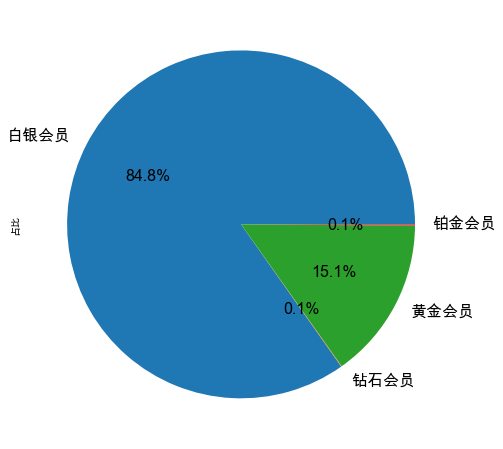

In [28]:
# 报表可视化
# autopct 显示数据标签，并指定保留小数位数
ratio.loc[['白银会员','钻石会员','黄金会员','铂金会员'],'占比'].plot.pie(figsize=(16,8),autopct='%.1f%%',fontsize=16)


## 线上线下增量分析

In [29]:
#按会员来源进行分组 使用groupby实现
from_data = custom_info.groupby(['注册年月','会员来源'])[['会员卡号']].count()
from_data = from_data.unstack()
from_data.columns = ['电商入口', '线下扫码']
from_data = from_data[1:]
from_data


,电商入口,线下扫码
注册年月,,
2017-09,1,759
2017-10,1,995
2017-11,4,1706
2017-12,510,3655
2018-01,11739,3792
2018-02,10665,3133
2018-03,6652,42668
2018-04,3396,68303
2018-05,3560,23449


In [31]:
# 透视表实现
custom_info.pivot_table(index = ['注册年月'],columns='会员来源',values ='会员卡号',aggfunc = 'count')


会员来源,电商入口,线下扫码
注册年月,,
2017-08,128,392782
2017-09,1,759
2017-10,1,995
2017-11,4,1706
2017-12,510,3655
2018-01,11739,3792
2018-02,10665,3133
2018-03,6652,42668
2018-04,3396,68303


Text(0.5, 1.0, '电商与线下会员增量分析')

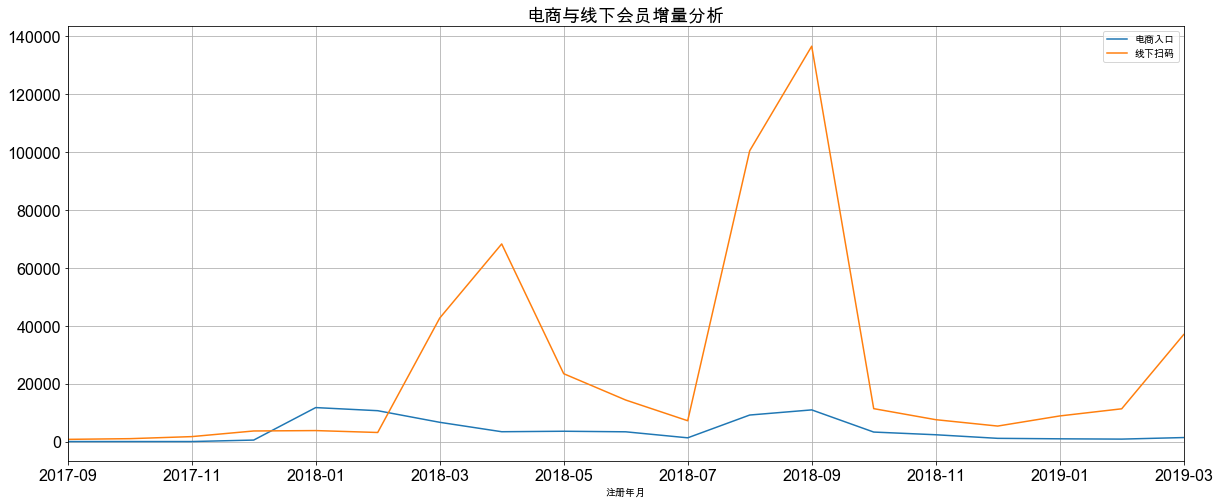

In [32]:
# 可视化
from_data.plot(figsize=(20,8),fontsize=16,grid=True)
plt.title("电商与线下会员增量分析",fontsize=18)


## 地区店均会员数量

In [38]:
# 会员信息查询表中，只有店铺信息，没有地区信息，需要从门店信息表中关联地区信息
# 查看门店信息表
store_info = pd.read_excel('data/门店信息表.XLSX')
store_info


,店铺代码,地区编码,渠道大类,商圈等级描述,商圈类别描述,店铺位置,店铺状态,仓储类别,营业员数,仓储面积,店铺等级,店铺时尚度,接受价格等级,店铺类型,装修代数
0,DPX00X,GBL6020,DZ01,流行,中心,1F中岛,A,店外仓,2.0,15,A,2.0,中,1.0,8代
1,DPX002,GBL6020,DZ01,流行,中心,1F中岛,A,店外仓,2.0,17,A,1.0,中,1.0,7代
2,DPX003,GBL6020,DZ01,流行,中心,2F中岛,A,店外仓,2.0,10,B,2.0,中,1.0,7代
3,DPX004,GBL6020,DZ01,流行,新兴,1F边厅,A,店外仓,2.0,13,B,2.0,中,1.0,7代
4,DPX005,GBL6020,DZ01,流行,中心,1F边厅,A,店外仓,3.0,9,B,1.0,中,1.0,7代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,DPJ034,GBL6010,DZ01,流行,新兴,2F边厅,A,店内仓,4.0,20,B,2.0,中,2.0,8代
787,DPJ036,GBL6120,DZ01,流行,中心,1F边厅,A,店外仓,3.0,30,B,2.0,中,2.0,8代
788,DPJ037,GBL6100,DZ01,大众,中心,二楼边厅,A,店内仓,3.0,20,A,2.0,中,2.0,8代
789,DPJ038,GBL6060,DZ01,折扣,郊区,2F边厅,A,店内仓,6.0,50,A,2.0,中,2.0,NaN


In [39]:
# 只需要用到门店信息表中的[['店铺代码'，'地区编码']] 两列
store_info[['店铺代码','地区编码']].head()


,店铺代码,地区编码
0,DPX00X,GBL6020
1,DPX002,GBL6020
2,DPX003,GBL6020
3,DPX004,GBL6020
4,DPX005,GBL6020


In [40]:

# 使用custom_info与store_info 关联，将地区编码添加到custom_info中
custom_info1 = pd.merge(custom_info,store_info[['店铺代码','地区编码']],left_on='所属店铺编码',right_on='店铺代码')


In [41]:
# 统计不同地区的会员数量 注意只统计线下，不统计电商渠道 GBL6D01为电商
district = custom_info1[custom_info1['地区编码']!='GBL6D01'].groupby('地区编码')[['会员卡号']].count()


In [43]:
# 修改列名
district.columns = ['会员数量']


In [44]:
# 计算店铺数
district['店铺数'] = custom_info1[['地区编码','所属店铺编码']].drop_duplicates().groupby('地区编码')['所属店铺编码'].count()
district


,会员数量,店铺数
地区编码,,
GBL6010,51745,40
GBL6020,46945,41
GBL6030,112114,78
GBL6040,63426,47
GBL6050,50474,38
GBL6060,74447,31
GBL6070,147804,114
GBL6080,66750,70
GBL6090,66685,66


In [45]:
# 每店平均会员数
district.loc[:,'每店平均会员数']=round(district['会员数量'].div(district['店铺数']))


In [46]:
# 计算总体平均数
district.loc[:,'总平均会员数']=district['会员数量'].sum()/district['店铺数'].sum()


In [47]:
# 排序
district=district.sort_values(by='每店平均会员数',ascending=False)
district.head()


,会员数量,店铺数,每店平均会员数,总平均会员数
地区编码,,,,
GBL6060,74447,31,2402.0,1173.60719
GBL6030,112114,78,1437.0,1173.60719
GBL6040,63426,47,1349.0,1173.60719
GBL6050,50474,38,1328.0,1173.60719
GBL6070,147804,114,1297.0,1173.60719


Text(0.5, 1.0, '地区店均会员分析')

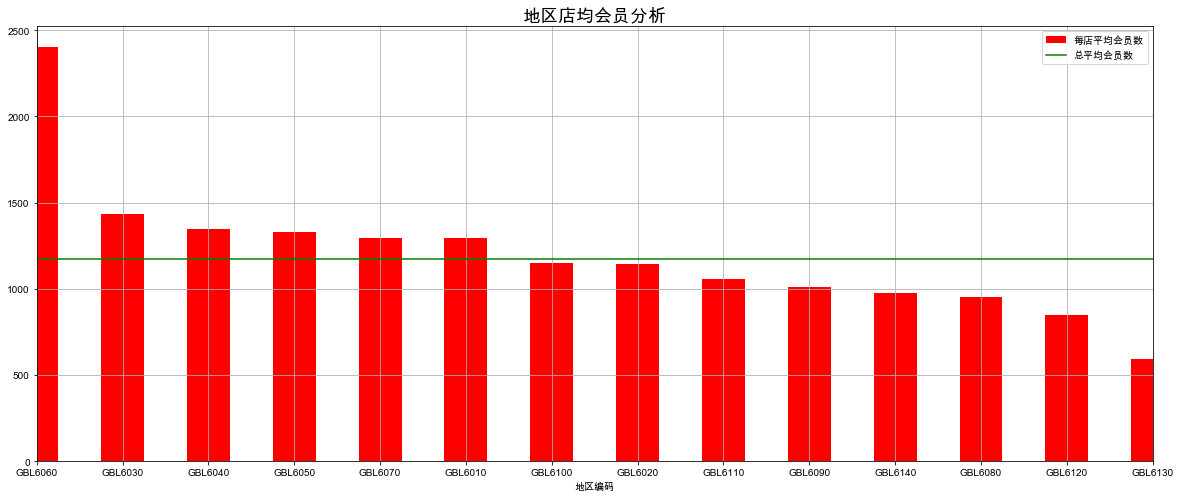

In [48]:
# 数据可视化
district['每店平均会员数'].plot.bar(figsize=(20,8),color='r',legend = True,grid=True)
district['总平均会员数'].plot(figsize=(20,8),color='g',legend = True,grid=True)
plt.title("地区店均会员分析",fontsize=18)


## 各地区会销比


In [49]:
# 加载数据
custom_consume=pd.read_excel('data/会员消费报表.xlsx')
all_orders=pd.read_excel('data/全国销售订单数量表.xlsx')
custom_consume.head()


,卡号,订单日期,订单号,订单类型,店铺代码,款号,尺码,消费数量,消费金额,当前积分
0,HS340766JAF6,2018-11-30,ODLOX6BXX8X2BXBBBBX,下单,DPX60X,BLA267Q3X13AQM,230,1,1200.0,800
1,BL6093039999465603590,2018-11-30,ODODOXF77X8X2BXBBBB2,下单,DPX377,BLA2651QX14AQC,240,1,1332.0,2531
2,BL6093909593939600407,2018-11-30,ROX8XXFBBBB6BB,退单,DPS00X,TMA27727X5QAQM,240,-1,-112.5,328
3,BL6093036096030709394,2018-11-30,ROX8XXFBBBB6X7,退单,DPS00X,TMA67621X5QBQTM,230,-1,-60.0,1038
4,BL6093993066943700650,2018-11-30,ODLOX6BFX8XXFBBBBBX,下单,DPX603,BLA26663X52AQTM,235,1,1200.0,800


In [50]:
all_orders.head()


,年月,地区代码,店铺代码,全部订单数,会员订单数
0,201801,GBL6030,DPX077,130,7.0
1,201801,GBL6030,DPX078,277,19.0
2,201801,GBL6030,DPX079,163,1.0
3,201801,GBL6030,DPX08X,154,5.0
4,201801,GBL6030,DPX082,276,14.0


In [51]:

# 为会员消费报表添加年月列
# 添加年月  这里年月要转换成整数,因为等会后面要链接的字段是整数
custom_consume.loc[:,'年月']=pd.to_datetime(custom_consume['订单日期']).apply(lambda x:datetime.strftime(x,'%Y%m')).astype(np.int)
custom_consume.head()



,卡号,订单日期,订单号,订单类型,店铺代码,款号,尺码,消费数量,消费金额,当前积分,年月
0,HS340766JAF6,2018-11-30,ODLOX6BXX8X2BXBBBBX,下单,DPX60X,BLA267Q3X13AQM,230,1,1200.0,800,201811
1,BL6093039999465603590,2018-11-30,ODODOXF77X8X2BXBBBB2,下单,DPX377,BLA2651QX14AQC,240,1,1332.0,2531,201811
2,BL6093909593939600407,2018-11-30,ROX8XXFBBBB6BB,退单,DPS00X,TMA27727X5QAQM,240,-1,-112.5,328,201811
3,BL6093036096030709394,2018-11-30,ROX8XXFBBBB6X7,退单,DPS00X,TMA67621X5QBQTM,230,-1,-60.0,1038,201811
4,BL6093993066943700650,2018-11-30,ODLOX6BFX8XXFBBBBBX,下单,DPX603,BLA26663X52AQTM,235,1,1200.0,800,201811


In [52]:
# 为会员消费报表添加地区编码
custom_consume=pd.merge(custom_consume,store_info[['店铺代码','地区编码']],on='店铺代码')
custom_consume.head()



,卡号,订单日期,订单号,订单类型,店铺代码,款号,尺码,消费数量,消费金额,当前积分,年月,地区编码
0,HS340766JAF6,2018-11-30,ODLOX6BXX8X2BXBBBBX,下单,DPX60X,BLA267Q3X13AQM,230,1,1200.0,800,201811,GBL6140
1,BL6093996469665709064,2018-11-28,ODROX6BXX8XX28BBBB2,退单,DPX60X,BLA26725X13AQTM,235,-1,-1200.0,100,201811,GBL6140
2,BL6093996469665709064,2018-11-28,ODLOX6BXX8XX28BBBBX,下单,DPX60X,BLA26725X13AQTM,235,1,1200.0,900,201811,GBL6140
3,BL6093996469665709064,2018-11-27,ODROX6BXX8XX29BBBBX,退单,DPX60X,BLA26725X13AQTM,235,-1,-1200.0,900,201811,GBL6140
4,BL6093996469665709064,2018-11-27,ODLOX6BXX8XX28BBBB2,下单,DPX60X,BLA26725X13AQTM,235,1,1200.0,1700,201811,GBL6140


In [53]:
# 剔除电商数据，统计会员购买订单数量
# margins参数 每行每列求和
member_orders=custom_consume[custom_consume['地区编码']!='GBL6D01'].pivot_table(values = '消费数量',index='地区编码',columns='年月',aggfunc=sum,margins=True)
member_orders


年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,All
地区编码,,,,,,,,,,,,,,
GBL6010,127,74,145,113,70,35,45,82,56,61,51,43,253,1155
GBL6020,15,31,15,5,499,593,90,980,588,80,8,55,291,3250
GBL6030,1989,1503,2572,3264,4079,4023,3349,4434,5198,3499,2386,2725,3660,42681
GBL6040,432,622,671,753,938,598,662,1259,1206,516,442,404,628,9131
GBL6050,522,618,1007,1771,2420,1770,1491,1428,1218,927,744,783,1151,15850
GBL6060,431,453,600,535,756,634,651,763,707,270,167,122,156,6245
GBL6070,1018,879,1106,1203,1248,1172,1081,1993,2917,1408,1063,1129,1408,17625
GBL6080,10,9,16,4,91,53,23,1221,1120,121,47,49,670,3434
GBL6090,326,342,541,629,606,436,331,1217,1564,809,646,445,440,8332


In [54]:
# 全部订单数
country_sales=all_orders.pivot_table(values = '全部订单数',index='地区代码',columns='年月',aggfunc=sum,margins=True)
country_sales


年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,All
地区代码,,,,,,,,,,,,,,
GBL6010,6313,7576,7736,10455,12881,9287,8162,8151,6190,5500,5894,5313,6643,100101
GBL6020,8038,10076,9776,11758,14248,10947,11335,9291,8847,6927,5618,6407,8257,121525
GBL6030,16380,16995,23606,22201,22584,17215,15608,14297,17721,15831,15377,13350,14858,226023
GBL6040,9284,12724,10448,12882,12682,10219,11490,11598,10083,9082,6787,7214,10404,134897
GBL6050,3334,4849,4443,5911,6589,5264,4483,4278,4666,3743,3926,3372,5067,59925
GBL6060,2848,3847,5225,6018,6509,4810,4594,4148,4511,3906,3295,2766,3209,55686
GBL6070,14375,17605,22083,24989,26511,21979,18659,17956,22618,19918,14078,13658,16146,250575
GBL6080,6880,6733,8870,11386,13312,11234,8989,8552,10817,10301,11182,10015,10407,128678
GBL6090,5095,6562,10346,8907,9933,8107,7304,8297,9748,9287,7405,6033,6426,103450


In [55]:
# 计算各地区会销比
result=member_orders/country_sales
result.applymap(lambda x: format(x,".2%"))



年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,All
地区编码,,,,,,,,,,,,,,
GBL6010,2.01%,0.98%,1.87%,1.08%,0.54%,0.38%,0.55%,1.01%,0.90%,1.11%,0.87%,0.81%,3.81%,1.15%
GBL6020,0.19%,0.31%,0.15%,0.04%,3.50%,5.42%,0.79%,10.55%,6.65%,1.15%,0.14%,0.86%,3.52%,2.67%
GBL6030,12.14%,8.84%,10.90%,14.70%,18.06%,23.37%,21.46%,31.01%,29.33%,22.10%,15.52%,20.41%,24.63%,18.88%
GBL6040,4.65%,4.89%,6.42%,5.85%,7.40%,5.85%,5.76%,10.86%,11.96%,5.68%,6.51%,5.60%,6.04%,6.77%
GBL6050,15.66%,12.74%,22.66%,29.96%,36.73%,33.62%,33.26%,33.38%,26.10%,24.77%,18.95%,23.22%,22.72%,26.45%
GBL6060,15.13%,11.78%,11.48%,8.89%,11.61%,13.18%,14.17%,18.39%,15.67%,6.91%,5.07%,4.41%,4.86%,11.21%
GBL6070,7.08%,4.99%,5.01%,4.81%,4.71%,5.33%,5.79%,11.10%,12.90%,7.07%,7.55%,8.27%,8.72%,7.03%
GBL6080,0.15%,0.13%,0.18%,0.04%,0.68%,0.47%,0.26%,14.28%,10.35%,1.17%,0.42%,0.49%,6.44%,2.67%
GBL6090,6.40%,5.21%,5.23%,7.06%,6.10%,5.38%,4.53%,14.67%,16.04%,8.71%,8.72%,7.38%,6.85%,8.05%


## 会员连带率分析

In [56]:
# 统计订单的数量：需要对"订单号"去重,并且只要"下单"的数据,"退单"的不要
order_data=custom_consume.query(" 订单类型=='下单' & 地区编码!='GBL6D01'")


In [58]:
#去重  统计订单量需要去重  后面统计消费数量和消费金额不需要去重
order_count=order_data[['年月','地区编码','订单号']].drop_duplicates()
order_count=order_count.pivot_table(index = '地区编码',columns='年月',values='订单号',aggfunc='count')



In [59]:
# 统计消费商品数量
consume_count=order_data.pivot_table(values = '消费数量',index='地区编码',columns='年月',aggfunc=sum)
consume_count.head()


年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901
地区编码,,,,,,,,,,,,,
GBL6010,133,81,155,122,79,37,45,85,61,61,52,44,261
GBL6020,15,31,15,5,517,623,102,1012,613,92,9,56,292
GBL6030,2071,1547,2692,3374,4269,4219,3482,4621,5452,3668,2520,2834,3791
GBL6040,470,647,726,806,1008,657,718,1345,1298,572,463,431,658
GBL6050,543,637,1082,1846,2589,1906,1570,1524,1303,991,817,834,1209


In [60]:
# 计算连带率
result=consume_count/order_count


In [61]:
# 小数二位显示
result=result.applymap(lambda x:format(x,'.2f'))
result


年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901
地区编码,,,,,,,,,,,,,
GBL6010,1.04,1.08,1.10,1.12,1.32,1.12,1.22,1.52,1.20,1.27,1.18,1.16,1.21
GBL6020,1.00,1.00,1.00,1.00,1.08,1.11,1.38,1.10,1.14,1.16,1.12,1.40,1.52
GBL6030,1.18,1.24,1.33,1.55,1.46,1.50,1.45,1.36,1.33,1.41,1.30,1.24,1.30
GBL6040,1.08,1.09,1.13,1.12,1.11,1.13,1.16,1.15,1.17,1.18,1.16,1.12,1.23
GBL6050,1.06,1.09,1.11,1.14,1.14,1.15,1.33,1.23,1.16,1.22,1.15,1.17,1.25
GBL6060,1.11,1.10,1.24,1.16,1.22,1.22,1.32,1.26,1.30,1.22,1.22,1.23,1.57
GBL6070,1.21,1.29,1.27,1.21,1.26,1.36,1.31,1.27,1.34,1.48,1.33,1.34,1.52
GBL6080,1.09,1.00,1.21,1.00,1.34,1.45,1.47,1.31,1.36,1.40,1.30,1.37,1.21
GBL6090,1.12,1.16,1.26,1.24,1.29,1.26,1.39,1.34,1.44,1.26,1.24,1.29,1.34


## 会员复购率分析


In [62]:
# 统计会员消费次数与是否复购
# 由于一个会员同一天消费多次也算一次消费，所以会员消费次数按一天一次计算 因此需要对"会员卡号"和"时间"进行去重
order_data=custom_consume.query("订单类型=='下单'")


In [63]:
# 因为需要用到地区编号和年月  所以选择 订单日期  卡号   年月   地区编码  四个字段一起去重
order_data=order_data[['订单日期','卡号','年月','地区编码']].drop_duplicates()
consume_count = order_data.pivot_table(index =['地区编码','卡号'],values='订单日期',aggfunc='count').reset_index()
consume_count.rename(columns={'订单日期':'消费次数'},inplace=True)
consume_count



,地区编码,卡号,消费次数
0,GBL6010,BL6093030369930903555,1
1,GBL6010,BL6093030394336509657,1
2,GBL6010,BL6093030394665709666,1
3,GBL6010,BL6093030394669709994,1
4,GBL6010,BL6093030396343606006,1
...,...,...,...
109166,GBL6D01,SB069030JAF6,2
109167,GBL6D01,SB090405JA7A,1
109168,GBL6D01,SB096777JA93,4
109169,GBL6D01,SB099053JAB3,2


In [64]:
# 判断是否复购
consume_count['是否复购']=consume_count['消费次数']>1
consume_count


,地区编码,卡号,消费次数,是否复购
0,GBL6010,BL6093030369930903555,1,False
1,GBL6010,BL6093030394336509657,1,False
2,GBL6010,BL6093030394665709666,1,False
3,GBL6010,BL6093030394669709994,1,False
4,GBL6010,BL6093030396343606006,1,False
...,...,...,...,...
109166,GBL6D01,SB069030JAF6,2,True
109167,GBL6D01,SB090405JA7A,1,False
109168,GBL6D01,SB096777JA93,4,True
109169,GBL6D01,SB099053JAB3,2,True


In [65]:
# 计算复购率并定义函数，统计每个地区的购买人数和复购人数
depart_data=consume_count.pivot_table(index = ['地区编码'],values=['消费次数','是否复购'],aggfunc={'消费次数':'count','是否复购':'sum'})
depart_data.columns=['复购人数','购买人数']
depart_data



,复购人数,购买人数
地区编码,,
GBL6010,64.0,791
GBL6020,126.0,2608
GBL6030,2606.0,26395
GBL6040,454.0,3918
GBL6050,1467.0,11129
GBL6060,440.0,4250
GBL6070,1498.0,7991
GBL6080,127.0,2335
GBL6090,582.0,3518


In [66]:
# 计算复购率
depart_data.loc[:,'复购率']=depart_data['复购人数']/depart_data['购买人数']
depart_data


,复购人数,购买人数,复购率
地区编码,,,
GBL6010,64.0,791,0.080910
GBL6020,126.0,2608,0.048313
GBL6030,2606.0,26395,0.098731
GBL6040,454.0,3918,0.115875
GBL6050,1467.0,11129,0.131818
GBL6060,440.0,4250,0.103529
GBL6070,1498.0,7991,0.187461
GBL6080,127.0,2335,0.054390
GBL6090,582.0,3518,0.165435


In [67]:
def stats_reorder(start,end,col):
    """
    统计指定起始年月的复购率
    """
    #只要下单的数据  退单不统计
    order_data=custom_consume.query("订单类型=='下单'")
    #筛选日期
    order_data= order_data[(order_data['年月']<=end) & (order_data['年月']>=start)]
    #因为需要用到地区编号和年月  所以选择 订单日期  卡号   年月   地区编码  四个字段一起去重
    order_data=order_data[['订单日期','卡号','年月','地区编码']].drop_duplicates()
    #按照地区编码和卡号进行分组  统计订单日期数量  就是每个地区每个会员的购买次数
    consume_count = order_data.pivot_table(index =['地区编码','卡号'],values='订单日期',aggfunc='count').reset_index()
    #重命名列
    consume_count.rename(columns={'订单日期':'消费次数'},inplace=True)
    #判断是否复购
    consume_count['是否复购']=consume_count['消费次数']>1
    #统计每个地区的购买人数和复购人数
    depart_data=consume_count.pivot_table(index = ['地区编码'],values=['消费次数','是否复购'],aggfunc={'消费次数':'count','是否复购':'sum'})
    
    #重命名列
    depart_data.columns=['复购人数','购买人数']
    #计算复购率
    depart_data[col+'复购率']=depart_data['复购人数']/depart_data['购买人数']
   
    return depart_data

In [68]:
# 统计2018年01月~2018年12月复购率和2018年02月~2019年01月复购率
# 计算2018年的复购率
reorder_2018=stats_reorder(201801,201812,'2018.01-2018.12')
reorder_2018


,复购人数,购买人数,2018.01-2018.12复购率
地区编码,,,
GBL6010,55.0,611,0.090016
GBL6020,107.0,2461,0.043478
GBL6030,2297.0,24108,0.095280
GBL6040,423.0,3669,0.115290
GBL6050,1313.0,10454,0.125598
GBL6060,429.0,4171,0.102853
GBL6070,1379.0,7601,0.181423
GBL6080,98.0,1849,0.053002
GBL6090,534.0,3388,0.157615


In [69]:
# 计算2018年02月~2019年01月的复购率
reorder_2019=stats_reorder(201802,201901,'2018.02-2019.01')
reorder_2019



,复购人数,购买人数,2018.02-2019.01复购率
地区编码,,,
GBL6010,55.0,702,0.078348
GBL6020,125.0,2600,0.048077
GBL6030,2410.0,25161,0.095783
GBL6040,423.0,3737,0.113192
GBL6050,1402.0,10783,0.130019
GBL6060,391.0,3971,0.098464
GBL6070,1382.0,7585,0.182202
GBL6080,127.0,2326,0.054600
GBL6090,559.0,3428,0.163069


In [70]:
# 计算复购率环比
# 合并数据
result=pd.concat([reorder_2018['2018.01-2018.12复购率'],reorder_2019['2018.02-2019.01复购率']],axis = 1)



In [71]:
#计算环比
result['环比']=(result['2018.02-2019.01复购率']-result['2018.01-2018.12复购率'])


In [72]:
#百分数显示
result=result.applymap(lambda x:format(x,'.2%'))
result


,2018.01-2018.12复购率,2018.02-2019.01复购率,环比
地区编码,,,
GBL6010,9.00%,7.83%,-1.17%
GBL6020,4.35%,4.81%,0.46%
GBL6030,9.53%,9.58%,0.05%
GBL6040,11.53%,11.32%,-0.21%
GBL6050,12.56%,13.00%,0.44%
GBL6060,10.29%,9.85%,-0.44%
GBL6070,18.14%,18.22%,0.08%
GBL6080,5.30%,5.46%,0.16%
GBL6090,15.76%,16.31%,0.55%
